In [ ]:
# DATA DOWNLOAD FROM YAHOO FINANCE

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os 
from mpl_toolkits.mplot3d import Axes3D

In [449]:
data = yf.download('AMZN', start='2020-03-01', end='2021-03-01')

[*********************100%***********************]  1 of 1 completed


In [450]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1906.489990,1954.510010,1870.000000,1953.949951,1953.949951,6761700
2020-03-03,1975.369995,1996.329956,1888.089966,1908.989990,1908.989990,7534500
2020-03-04,1946.569946,1978.000000,1922.000000,1975.829956,1975.829956,4772900
2020-03-05,1933.000000,1960.719971,1910.000000,1924.030029,1924.030029,4748200
2020-03-06,1875.000000,1910.869995,1869.500000,1901.089966,1901.089966,5273600


In [451]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,3208.129883,3232.320068,3172.260010,3180.739990,3180.739990,3515700
2021-02-23,3127.030029,3204.729980,3093.600098,3194.500000,3194.500000,4677200
2021-02-24,3166.750000,3171.229980,3125.379883,3159.530029,3159.530029,3011300
2021-02-25,3136.739990,3178.260010,3047.760010,3057.159912,3057.159912,4533800
2021-02-26,3095.199951,3122.439941,3036.699951,3092.929932,3092.929932,4273500


In [452]:
data = pd.DataFrame(data = data['Adj Close'])
data

,Adj Close
Date,
2020-03-02,1953.949951
2020-03-03,1908.989990
2020-03-04,1975.829956
2020-03-05,1924.030029
2020-03-06,1901.089966
...,...
2021-02-22,3180.739990
2021-02-23,3194.500000
2021-02-24,3159.530029


array([<AxesSubplot:xlabel='Date'>], dtype=object)

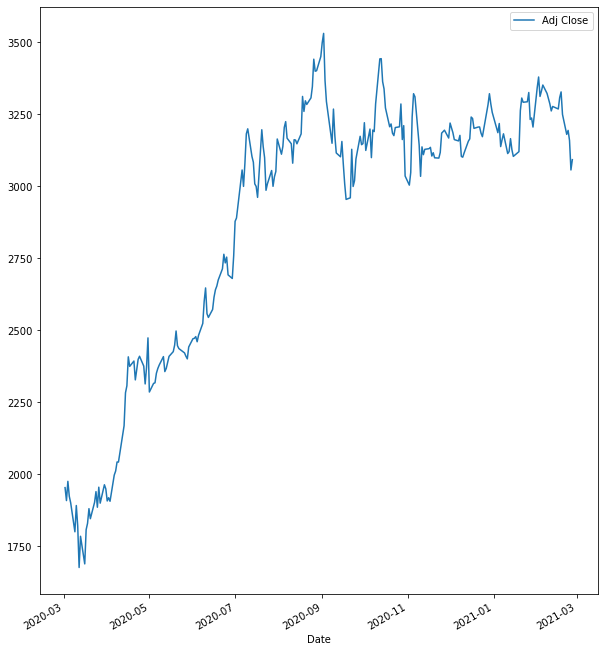

In [453]:
data.plot(figsize=(10,12), subplots=True)

In [454]:
data.describe().round()

,Adj Close
count,251.0
mean,2877.0
std,475.0
min,1677.0
25%,2472.0
50%,3112.0
75%,3206.0
max,3531.0


In [455]:
data['returns'] = (data['Adj Close'] / data['Adj Close'].shift(1)) -1
data

,Adj Close,returns
Date,,
2020-03-02,1953.949951,NaN
2020-03-03,1908.989990,-0.023010
2020-03-04,1975.829956,0.035013
2020-03-05,1924.030029,-0.026217
2020-03-06,1901.089966,-0.011923
...,...,...
2021-02-22,3180.739990,-0.021281
2021-02-23,3194.500000,0.004326
2021-02-24,3159.530029,-0.010947


In [456]:
# DAILY VOLATILITY

daily_std = np.std(data.returns)
daily_std

0.023934136093383216

In [457]:
# ANNUALIZED VOLATILITY

std = daily_std * np.sqrt(252)
std

0.3799426316896019

In [458]:
# SAMPLE SIZE 6M

data = yf.download('AMZN', start='2020-09-01', end='2021-03-01')

[*********************100%***********************]  1 of 1 completed


In [459]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-31,3408.989990,3495.000000,3405.000000,3450.959961,3450.959961,4185900
2020-09-01,3489.580078,3513.870117,3467.000000,3499.120117,3499.120117,3476400
2020-09-02,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,3931500
2020-09-03,3485.000000,3488.409912,3303.000000,3368.000000,3368.000000,8161100
2020-09-04,3318.000000,3381.500000,3111.129883,3294.620117,3294.620117,8781800


In [460]:
data = pd.DataFrame(data = data['Adj Close'])
data

,Adj Close
Date,
2020-08-31,3450.959961
2020-09-01,3499.120117
2020-09-02,3531.449951
2020-09-03,3368.000000
2020-09-04,3294.620117
...,...
2021-02-22,3180.739990
2021-02-23,3194.500000
2021-02-24,3159.530029


array([<AxesSubplot:xlabel='Date'>], dtype=object)

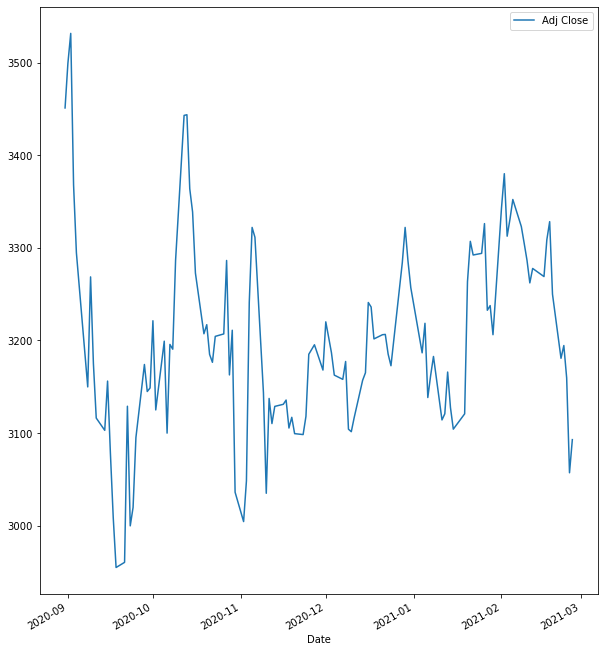

In [461]:
data.plot(figsize=(10,12), subplots=True)

In [462]:
data.describe().round()

,Adj Close
count,124.0
mean,3201.0
std,106.0
min,2955.0
25%,3128.0
50%,3187.0
75%,3274.0
max,3531.0


In [463]:
data['returns'] = (data['Adj Close'] / data['Adj Close'].shift(1)) -1
data

,Adj Close,returns
Date,,
2020-08-31,3450.959961,NaN
2020-09-01,3499.120117,0.013956
2020-09-02,3531.449951,0.009239
2020-09-03,3368.000000,-0.046284
2020-09-04,3294.620117,-0.021787
...,...,...
2021-02-22,3180.739990,-0.021281
2021-02-23,3194.500000,0.004326
2021-02-24,3159.530029,-0.010947


In [464]:
# DAILY VOLATILITY

daily_std = np.std(data.returns)
daily_std

0.02097015598518784

In [465]:
# ANNUALIZED VOLATILITY

std = daily_std * np.sqrt(252)
std

0.3328909061462382

In [466]:
S0 = 3110.87              # spot stock price
K = 3100.00                # strike ATM
T = 4/52                 # maturity 
r = 0.0174                 # risk free rate 
sig = 0.3575               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = 'put'          # payoff

In [467]:
def binary_option_bs(S, K, T, r, sig, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [468]:
binary_option_bs(3110.87, 3100, 4/52, 0.0174, 0.3575, 'put')

0.4996399908424095

In [469]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [470]:
T = 4/52
r = 0.0174
sigma = 0.3575
S0 = 3110.87
K = 3100.00

In [471]:
S = mcs_simulation_np(1000)

In [472]:
S = np.transpose(S)
S

array([[3110.87      , 3107.68034756, 3099.00986823, ..., 2504.11680851,
        2495.22994861, 2497.23890701],
       [3110.87      , 3123.84991565, 3126.29909456, ..., 2950.69448269,
        2955.30943145, 2950.15224479],
       [3110.87      , 3109.51717735, 3118.4947897 , ..., 2889.99201889,
        2885.12276493, 2885.57487868],
       ...,
       [3110.87      , 3107.24379616, 3113.02237171, ..., 3206.97176493,
        3196.20988739, 3207.86957316],
       [3110.87      , 3137.57306208, 3140.59714315, ..., 3360.24612037,
        3354.019337  , 3358.81285898],
       [3110.87      , 3106.19516642, 3102.3171958 , ..., 3352.36364106,
        3358.12679584, 3360.36568058]])

In [474]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.34265734265734266


In [475]:
def delta(S, K, T, r, q, sig, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        delta = (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) / (sig * np.sqrt(T))
    elif payoff == "put":
        delta =  - (np.exp(-r * T) * si.norm.pdf(-d2, 0.0, 1.0)) / (sig * S * np.sqrt(T))
    
    return delta

In [476]:
delta(3110.87, 3100, 4/52, 0.0174, 0, 0.3575, 'put')


-0.0012916427665803664

In [477]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 3110.87, T[i], 4/52, 0.0, 0.3575, 'put')

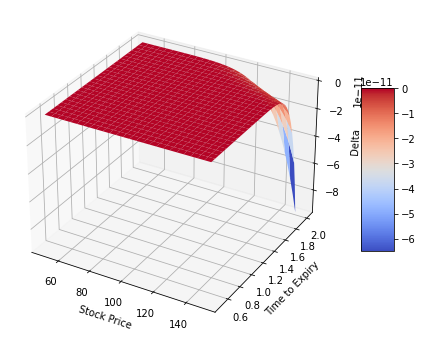

In [478]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [479]:
d = delta(3110.87, 3100.00, 4/52, 0.0174, 0.0, 0.3575, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.0013 . If the stock price increase 1 dollar, then the value of the option will increase $ -0.0013 .


In [480]:
def gamma(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        gamma = - (np.exp(-r * T) * d1 * si.norm.pdf(d1, 0.0, 1.0)) / (sig**2 * S**2 * np.sqrt(T))
    elif payoff == "put":
        gamma =  (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0)) / (sig **2 * S**2* np.sqrt(T))
    
    return gamma

In [481]:
gamma(3110.87, 3100, 4/52, 0.0174, 0, 0.3575, 'put')

1.142564997937342e-07

In [482]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 3110.87, T[i], 4/52, 0.0, 0.3575, 'put')

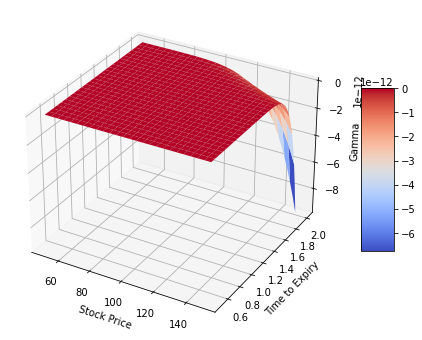

In [483]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [484]:
def theta(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    Y = d1 /(2 * T)
    Z = (r - q) / sig * np.sqrt(T)
    if payoff == "call":
        theta = r * np.exp(-r * T) * (d1,0.0,1.0) * si.norm.cdf(d2,0.0,1.0) + np.exp(-r * T) * si.norm.pdf(d2,0.0,1.0) * (Y - Z)
    elif payoff == "put":
        theta = r * np.exp(-r * T) * (1 - si.norm.cdf(-d1, 0.0, 1.0)) - (np.exp(-r * T) * si.norm.pdf(d2,0.0,1.0)) * (Y - Z)
    
    return theta

In [485]:
theta(3110.87, 3100.00, 4/52, 0.0174, 0, 0.3575, 'put') * -1

0.2400168428797643

In [486]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 3110.87, T[i], 4/52, 0, 0.3575, 'put')

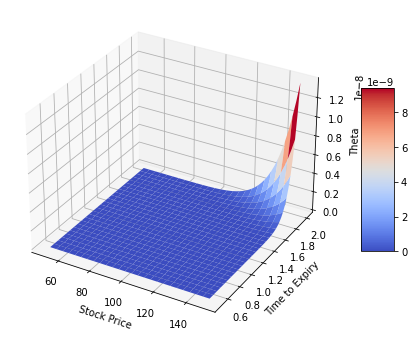

In [487]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [488]:
def rho(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        rho =  - (T) * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + (np.sqrt(T) / (sig)) * (np.exp(-r * T) * si.norm.pdf(d2,0.0,1.0))
    elif payoff == "put":
        rho = - (T) * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - (np.sqrt(T) / (sig)) * (np.exp(-r * T) * si.norm.pdf(d2,0.0,1.0))
    
    return rho

In [489]:
rho(3110.87, 3100, 4/52, 0.0174, 0.0, 0.3575, 'put')

-0.3475209787780212

In [490]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 3110.87, T[i], 4/52, 0.0, 0.3575, 'put')

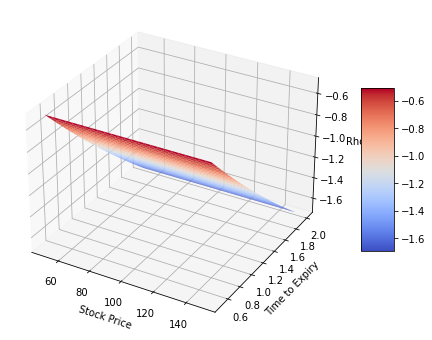

In [491]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [492]:
def vega(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r -q + 0.5 * sig **2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r -q - 0.5 * sig **2) * T) / (sig * np.sqrt(T))
    A = np.sqrt(T)
    B = ((d2)/sig)
    if payoff == "call":
        vega = - np.exp(r * T) * si.norm.pdf(d2,0,1.0) * (A + B)
    elif payoff == "put":
        vega = np.exp(-r * T) * si.norm.pdf(d2,0,1) * (A + B)
        
    return vega    

In [493]:
vega(3110.87, 3100, 4/52, 0.0174, 0, 0.3575, 'put')

0.10963494700484258

In [494]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 3110.87, T[i], 4/52, 0.0, 0.3575, 'put')

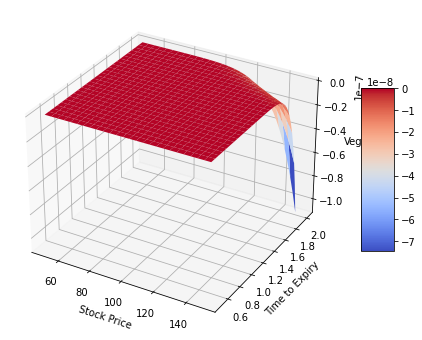

In [495]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);